In [1]:
import matplotlib.pyplot as plt
import cv2

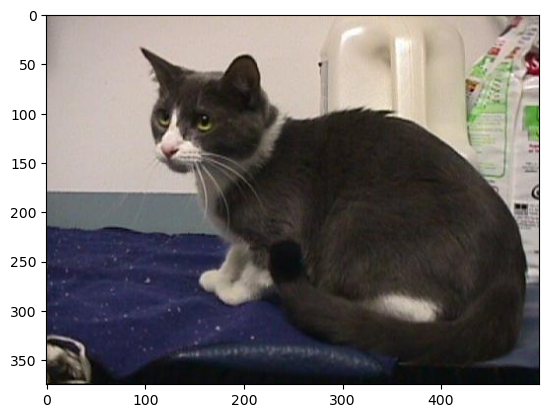

In [3]:
cat4 = cv2.imread("CATS_DOGS/train/CAT/4.jpg")
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [8]:
cat4.shape

(375, 500, 3)

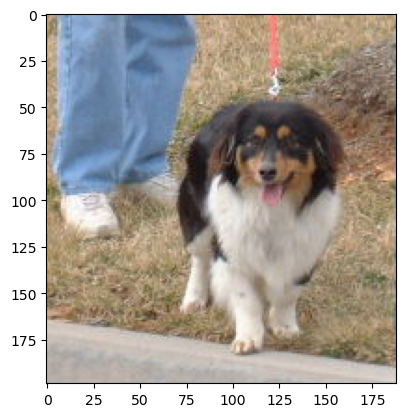

In [5]:
dog2 = cv2.imread("CATS_DOGS/train/DOG/2.jpg")
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)
plt.imshow(dog2)

In [7]:
dog2.shape

(199, 188, 3)

In [11]:
dog2.max()

255

In [12]:
#not all images has the same shape, so we prepare for the model
from keras.preprocessing.image import ImageDataGenerator
#you can test, just recomendation of this params for starts
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, 
                               zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

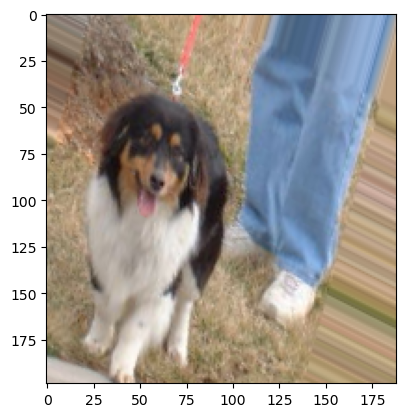

In [15]:
plt.imshow(image_gen.random_transform(dog2)) #one test

In [17]:
image_gen.flow_from_directory("CATS_DOGS/train") #show whats keras see

Found 18743 images belonging to 2 classes.


In [20]:
input_shape=(150,150,3) #arbitrary, made from an mediam by eye from the images, also can be calculated but there is no correct way

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D

In [29]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 32)      

In [30]:
batch_size = 16 #depends of situation, just test

train_image_gen = image_gen.flow_from_directory("CATS_DOGS/train", target_size=input_shape[:2], batch_size=batch_size, class_mode="binary")

Found 18743 images belonging to 2 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory("CATS_DOGS/test", target_size=input_shape[:2], batch_size=batch_size, class_mode="binary")

Found 6251 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
#steps_per_epoch, instead of run 16*18743 run 16*150 (16 is batch_size)
#epochs should be at least 100
results = model.fit(train_image_gen, epochs=10, steps_per_epoch=150, validation_data=test_image_gen, validation_steps=12) 

Epoch 1/10
  2/150 [..............................] - ETA: 9s - loss: 0.4752 - accuracy: 0.7500 

2024-04-04 01:44:19.145719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


150/150 [==============================] - 11s 70ms/step - loss: 0.5408 - accuracy: 0.7231 - val_loss: 0.6251 - val_accuracy: 0.6667
Epoch 2/10
150/150 [==============================] - 11s 70ms/step - loss: 0.5420 - accuracy: 0.7344 - val_loss: 0.5849 - val_accuracy: 0.7083
Epoch 3/10
150/150 [==============================] - 11s 71ms/step - loss: 0.5545 - accuracy: 0.7075 - val_loss: 0.5370 - val_accuracy: 0.7344
Epoch 4/10
150/150 [==============================] - 11s 71ms/step - loss: 0.5567 - accuracy: 0.7104 - val_loss: 0.5258 - val_accuracy: 0.7344
Epoch 5/10
150/150 [==============================] - 11s 71ms/step - loss: 0.5500 - accuracy: 0.7221 - val_loss: 0.5335 - val_accuracy: 0.7135
Epoch 6/10
150/150 [==============================] - 11s 70ms/step - loss: 0.5505 - accuracy: 0.7200 - val_loss: 0.5278 - val_accuracy: 0.7188
Epoch 7/10
150/150 [==============================] - 11s 70ms/step - loss: 0.5586 - accuracy: 0.7108 - val_loss: 0.5154 - val_accuracy: 0.7708
Epo

In [47]:
results.history['accuracy'] #one per epoch

[0.7231283783912659,
 0.7344207167625427,
 0.7074999809265137,
 0.7104166746139526,
 0.722083330154419,
 0.7200000286102295,
 0.7108333110809326,
 0.7287499904632568,
 0.7049999833106995,
 0.7191666960716248]

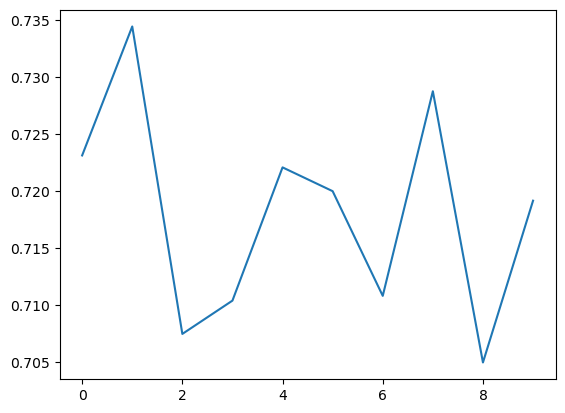

In [48]:
plt.plot(results.history["accuracy"]) #evolutions by epochs

In [49]:
#load from a model with 100 epochs
from keras.models import load_model
new_model = load_model("course material/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5")

In [91]:
#identify new image
dog_file = "CATS_DOGS/test/DOG/10011.jpg"
import keras.utils as image
dog_image = image.load_img(dog_file, target_size=input_shape[:2])
dog_image = image.img_to_array(dog_image)
dog_image.shape

(150, 150, 3)

In [92]:
import numpy as np #we change to have a batch of one image
dog_image = np.expand_dims(dog_image, axis=0)
dog_image.shape

(1, 150, 150, 3)

In [93]:
dog_image = dog_image/255

In [94]:
predictions = model.predict(dog_image)
predictions #more near ZERO is CAT and near ONE is DOG

1/1 [==============================] - 0s 20ms/step


array([[0.96026546]], dtype=float32)

In [95]:
classes = np.round(predictions).astype(int)
classes

array([[1]])